# 第5章 分类：其他技术

# 5.2 最近邻分类器

- **积极学习方法（eager learner）**
- **消极学习方法（lazy learner）**

消极学习的一个例子是**Rote分类器（Rote classifier）**，它记住整个训练数据，仅当测试实例的属性和某个训练样例完全匹配时才进行分类。该方法一个明显的缺点是有些测试记录不能被分类，因为没有任何训练样例与它们相匹配。

如果$k$太小，则最近邻分类器容易受到由于训练数据中的噪声而产生的过分拟合的影响；相反，如果$k$太大，最近邻分类器可能会误分类测试样例，因为最近邻列表中可能包含远离其近邻的数据点。

## 5.3 贝叶斯分类器

#### 5.3.1 贝叶斯定理（Bayes theorem）

$$P(Y|X)=\frac{P(X|Y)P(Y)}{P(X)}$$

#### 5.3.2 贝叶斯定理在分类中的应用

#### 5.3.3 朴素贝叶斯分类器

给定类标号 $y$，朴素贝叶斯分类器在估计类条件概率时假设属性之间条件独立。条件独立假设可形式化第表述如下：$$P(X|Y=y)=\prod_{i=1}^d P(X_i |Y=y)$$
其中每个属性集 $X=\{X_1,X_2,...,X_d\}$包含 $d$ 个属性。

##### 1. 条件独立性

##### 2. 朴素贝叶斯分类器如何工作

分类测试记录时，朴素贝叶斯分类器对每个类 $Y$ 计算后验概率：
$$P(Y|X)=\frac{P(Y)\prod_{i=1}^d P(X_i |Y)}{P(X)}$$

##### 3. 估计分类属性的条件概率

##### 4. 估计连续属性的条件概率

##### 5. 朴素贝叶斯分类器举例

##### 6.条件概率的 m 估计

$$P(x_i|y_j)=\frac{n_c+mp}{n+m}\tag{5-18}$$


#### 5.3.5 贝叶斯信念网络

##### 1. 模型表示

贝叶斯信念网络（Bayesian belief networds，BBN），简称贝叶斯网络，用图形表示一组随机变量之间的概率关系，贝叶斯网络有两个主要成分。  
（1）一个有向无环图（dag），表示变量之间的依赖关系。  
（2）一个概率表，把各结点和它的直接父结点关联起来。

**性质1　条件独立**　贝叶斯网络中的一个结点，如果它的父母结点已知，则它条件独立于它的所有非后代结点。

##### 2. 建立模型

贝叶斯网络的建模包括两个步骤：
1. 创建网络结构；（网络拓扑结构可以通过对主观的领域专家知识编码获得。）
2. 估计每一个结点的概率表中的概率值。

## 5.4 人工神经网络

#### 5.4.1 感知器

## 5.6 组合方法

通过聚集多个分类器的预测来提高分类准确率，这些技术称为**组合（ensemble）**或**分类器组合（classifier combination）**方法。组合方法由训练数据构建一组**基分类器（base classifier）**，然后通过对每个基分类器的预测进行投票来进行分类。

#### 5.6.1 组合方法的基本原理

In [1]:
from scipy.special import comb,perm

def errorEnsemble(x):
    result = 0
    for i in range(13,26):
        result += comb(25,i) * (x**i) * ((1-x)**(25-i))
    return result

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1)
y = np.zeros_like(x)
for i in range(len(y)):
    y[i] = errorEnsemble(x[i])

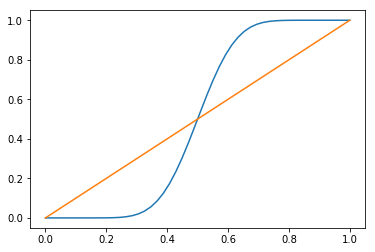

In [11]:
plt.figure(1)
plt.plot(x,y)
plt.plot(x,x)
plt.show()

In [9]:
y

array([  0.00000000e+00,   4.40378386e-16,   2.85587198e-12,
         4.38090928e-10,   1.44697640e-08,   2.05577563e-07,
         1.70978120e-06,   9.81101964e-06,   4.28412412e-05,
         1.51640015e-04,   4.54228842e-04,   1.18731321e-03,
         2.77014350e-03,   5.86846045e-03,   1.14393014e-02,
         2.07343493e-02,   3.52425645e-02,   5.65626735e-02,
         8.62112099e-02,   1.25388819e-01,   1.74742049e-01,
         2.34165629e-01,   3.02688444e-01,   3.78474599e-01,
         4.58950994e-01,   5.41049006e-01,   6.21525401e-01,
         6.97311556e-01,   7.65834371e-01,   8.25257951e-01,
         8.74611181e-01,   9.13788790e-01,   9.43437326e-01,
         9.64757436e-01,   9.79265651e-01,   9.88560699e-01,
         9.94131540e-01,   9.97229857e-01,   9.98812687e-01,
         9.99545771e-01,   9.99848360e-01,   9.99957159e-01,
         9.99990189e-01,   9.99998290e-01,   9.99999794e-01,
         9.99999986e-01,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,

#### 5.6.2 构建组合分类器的方法

组合方法的基本思想是：在原始数据上构建多个分类器，然后在分类未知样本时聚集它们的预测结果。

##### (1) 通过处理训练数据集。

**装袋（bagging）**和**提升（boosting）**是两种处理训练数据集的组合方法。

##### (2) 通过处理输入特征。

在这种方法中，通过选择输入特征的子集来形成每个训练集。子集可以随机选择，也可以根据领域专家的建议选择。一些研究表明，对那些含有大量冗余特征的数据集，这种方法的性能非常好。**随机森林（Random forest)**就是一种处理输入特征的组合方法，它使用决策树作为基分类器。

##### (3) 通过处理类标号。

这种方法适用于类数足够多的情况。通过将类标号随机划分成两个不相交的子集 $A_0$ 和 $A_1$，把训练数据变换为二类问题。类标号属于子集 $A_0$ 的训练样本指派到类0，而那些类标号属于子集 $A_1$ 的训练样本指派到类1。然后，使用重新标记过的数据来训练一个基分类器。

##### (4) 通过处理学习算法。

许多学习算法都可以这样来处理：在同一个训练数据集上多次执行算法可能得到不同的模型。

前三种属于一般性方法，适用于任何分类器，而第四种方法依赖于使用的分类器类型。
组合方法对于**不稳定分类器（unstable classifier）**效果较好。  
不稳定分类器是对训练集微小的变化都很敏感的基分类器。
不稳定分类器的例子包括：决策树、基于规则的分类器和人工神经网络。

#### 5.6.3 偏倚-方差分解

偏倚-方差分解是分析预测模型的预测误差的形式化方法。

#### 5.6.4 装袋

**装袋（bagging）**又称**自助聚集（boot strap aggregating）**，是一种根据均匀概率分布从数据集中重复抽样（有放回的）的技术。

一般来说，自助样本 $D_i$ 大约包含63%的原训练数据，因为每一个样本抽到 $D_i$ 的概率为$$1-(1-\frac{1}{N})^N$$

#### 5.6.5 提升

**提升**是一个迭代的过程，用来自适应地改变训练样本的分布，使得基分类器聚焦在那些很难分的样本上。  
与装袋不同，提升给每一个训练样本赋一个权值，而且可以在每一轮提升过程结束时自动地调整权值。

#### 5.6.6 随机森林

**随机森林（random forest）**是一类专门为决策树分类器设计的组合方法。它组合多棵决策树做出的预测，其中每棵树都是基于随机向量的一个独立集合的值产生的。

#### 5.6.7 组合方法的实验比较